In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Penalty_stats_propre_19-20.csv', sep=';', encoding='latin')
df.head(5)

,Id,Competition,Journee,Date,Home team,Away team,Team taking pen,Pen taker,Minute,LtD game-changing pen,DtW game-changing pen,L no game-changing,W no game-changing,Scored,PT sub,PT position,Team win,Last Goal
0,1,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,84.0,NO,NO,NO,YES,NO,YES,ST,YES,NO
1,2,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,86.0,NO,NO,NO,YES,YES,YES,ST,YES,NO
2,3,Premier League,1,11/08/2019,Manchester United,Chelsea,Home,Marcus Rashford,18.0,NO,YES,NO,NO,YES,NO,W,YES,NO
3,4,Premier League,2,17/08/2019,Aston Villa,Bournemouth,Away,Joshua King,2.0,NO,YES,NO,NO,YES,NO,OM,YES,NO
4,5,Premier League,2,19/08/2019,Wolverhampton,Manchester United,Away,Paul Pogba,68.0,NO,YES,NO,NO,NO,NO,DM,NO,YES


# Separando as cobraças de penalties por posições em campo

In [94]:
temp_df = df.groupby(['PT position', 'Scored']).size()
temp_df

PT position  Scored
CB           NO          1
             YES         6
DM           NO         11
             YES        49
LD           NO          7
             YES        11
OM           NO         11
             YES        57
ST           NO         54
             YES       187
W            NO         26
             YES        74
dtype: int64

<Axes: xlabel='PT position,Scored'>

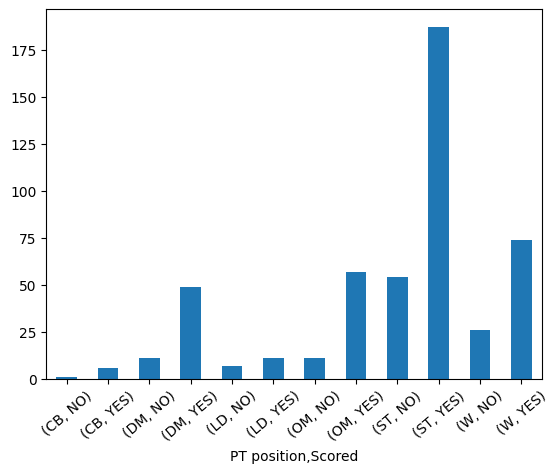

In [95]:
temp_df.plot.bar(x='PT position', y='Scored', rot=40)

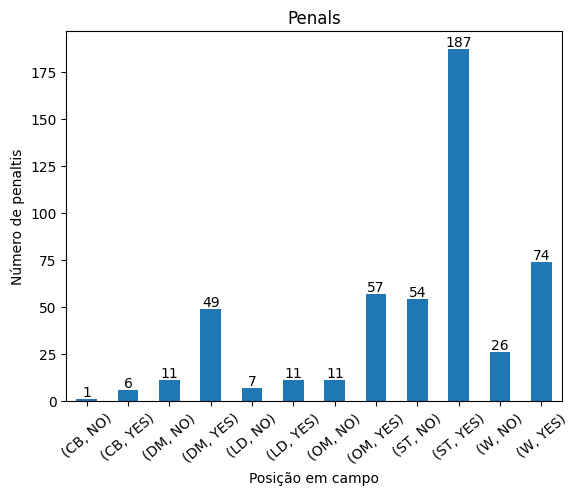

In [96]:
ax = temp_df.plot(kind='bar', xlabel='Posição em campo', ylabel='Número de penaltis', title='Penals', rot=40)
for c in ax.containers:
    ax.bar_label(c, label_type='edge')



In [90]:
temp_df.shape

(12,)

In [103]:
k = df.groupby(['PT position']).size().to_frame('total shots')
k

,total shots
PT position,
CB,7
DM,60
LD,18
OM,68
ST,241
W,100


In [123]:
total_df = df.groupby(['PT position', 'Scored']).size().unstack(fill_value=0)
total_df.head()

Scored,NO,YES
PT position,,
CB,1,6
DM,11,49
LD,7,11
OM,11,57
ST,54,187


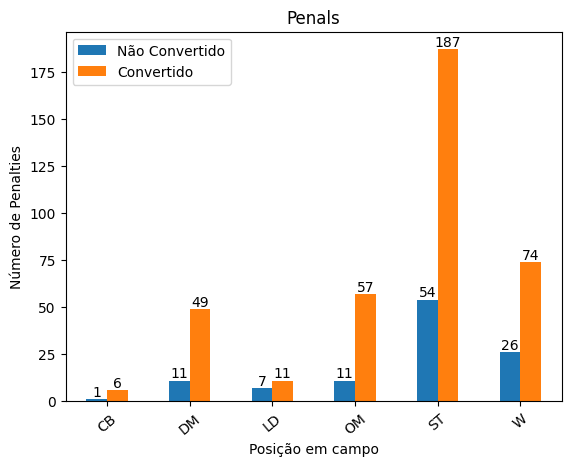

In [130]:
plot = total_df.plot(kind='bar', xlabel='Posição em campo', ylabel='Número de Penalties', title='Penals', rot=40)
for c in plot.containers:
    plot.bar_label(c, label_type='edge')
plot.legend(['Não Convertido', 'Convertido'])

## W = Winger (Ala), ST = Striker (Atacante), OM = Offensive Midfielder (Meia ofensivo), DM = Deffensive Midfielder (Meia defensivo), LD = Left Defender (Lateral Esquerdo), CB = Center Back (Zagueiro)

In [149]:
df_remade = df.groupby(['Scored', 'PT position']).size().unstack(fill_value=0)
df_remade.head()

PT position,CB,DM,LD,OM,ST,W
Scored,,,,,,
NO,1,11,7,11,54,26
YES,6,49,11,57,187,74


In [190]:
dic = {}
for position in df_remade:
    percent = df_remade[position].YES/(df_remade[position].YES + df_remade[position].NO)
    print(percent)
    to_dic = np.float16(percent)
    dic[position] = to_dic
dic

print(dic)

0.8571428571428571
0.8166666666666667
0.6111111111111112
0.8382352941176471
0.7759336099585062
0.74
{'CB': np.float16(0.857), 'DM': np.float16(0.817), 'LD': np.float16(0.6113), 'OM': np.float16(0.8384), 'ST': np.float16(0.776), 'W': np.float16(0.74)}


In [5]:

df.groupby('Competition').size()

Competition
Bundesliga           73
Champions league     46
Ligue 1              92
Premier League       95
SERIE A             188
dtype: int64

In [18]:
atacante = 0
meio_ofensivo = 0
meio_defensivo = 0
ala = 0
zaguiero = 0

atacante_acertou = 0
meio_ofensivo_acertou = 0
meio_defensivo_acertou = 0
ala_acertou = 0
zaguiero_acertou = 0
while df.iloc[i,1] == "Premier League":
    soma_de_penalties += 1
    if df.iloc[i,13]=='YES':
        acertou = acertou+1
        total_shot_by_position[df.iloc[i,15]] = True
    else:
        errou = errou + 1
        total
        



95